## HOUSE DATA PRICE

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jucyharo import *

from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm

from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, lasso_path, LassoCV

## Chargement des données

In [15]:
train = pd.read_csv('data/train.csv',index_col="Id")
test = pd.read_csv('data/test.csv',index_col="Id")

Paramètres de visualisation pour jupyter

In [16]:
plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 100

## Concaténation des données

### Concatenation du dataset pour faciliter le traitement

In [17]:
# sauvegarde du nombre de ligne du train et du test
n_train = train.shape[0]
n_test = test.shape[0]
# mettre le SalePrice le target dans une variable a part
target = train.SalePrice
# suppression de la colonne SalePrice
#train.drop(['SalePrice'], axis=1, inplace=True)
#concatenation des data train et test
df_inter = pd.concat((train, test))
df_inter.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [18]:
df_inter.drop(['OpenPorchSF'], axis=1, inplace=True)

In [19]:
df_inter.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [ ]:
train.drop(['LotFrontage'], axis=1, inplace=True)


## Gestion des données manquantes
Visualisation des données manquantes

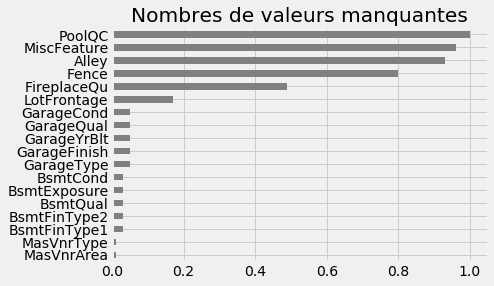

On décide de remplacer les n/a qualitatifs par un label "N/A"

## Gestion des valeurs manquantes

In [105]:
# Dans les colonnes à plus de 20% de NA, ont décide de remplacer les np.nan, par des NA string, ce qui pourrais nous 
# permettre de créer une nouvelle classe, s'il y a un eventuelle, on decide donc de les garder au lieu de les supprimer
cols_replace_na_cat = ["GarageType","GarageFinish","GarageQual","GarageCond",'BsmtQual','BsmtCond',
                       'BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']

for i in cols_replace_na_cat:
    df_inter[i].fillna('N/A', inplace=True)

In [106]:
# Nous decidons de remplacer les NA par des 0, plustôt que par la moyenne ou la mediane pour éviter de biaiser les 
# données. on peut peut pas utiliser la moyenne à cause des outliers et en utilisant la médiane on risque d'attriber
# des valeurs à des caractéristiques de maison qui n'existe pas.
cols_replace_na_num =['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath',
                      'GarageYrBlt','GarageArea','GarageCars','MasVnrArea']

for i in cols_replace_na_num:
    df_inter[i].fillna(0, inplace=True)

In [107]:
# Les variables listée ci-dessous possèdent un nombre de NA comprit entre 1 et 4, on decide donc de remplacer ces valeurs manquantes par la
# classe modale qui revient le plus.
cols_replace_na_cat1 = ['MSZoning','Utilities','Functional', 'SaleType','KitchenQual','Exterior2nd','Exterior1st','Electrical']

for i in cols_replace_na_cat1:
    df_inter[i].fillna(df_inter[i].mode()[0], inplace=True)

In [108]:
# j'ai préféré grouper par Neighborhood pour tenir compte de comment sont les lotFrontage de la ville
df_inter['LotFrontage'] = df_inter.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))

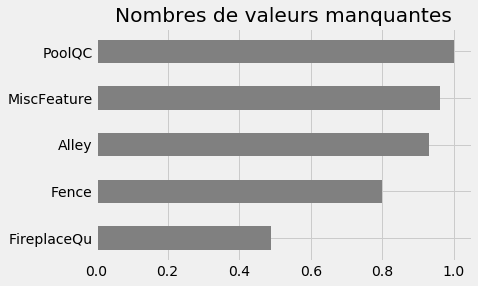

In [109]:
view_total_na(df_inter)

Utilisation des predictions pour remplacer les valeurs manquantes du sous-sol

## Reconstitution de la data

In [110]:
## Cette méthode permet d'éviter les erreurs en cas de lignes supprimées
# Les index doivent correspondres à l'id des ventes (voir le chargement de données)
# Ne peux pas être viable si une réinitisalisation des index est efféctuée

is_index_train = df_inter.index.isin(train.index)
is_index_test = df_inter.index.isin(test.index)

# reconstitution test nettoyé
test_clean = df_inter[is_index_test]

# reconstitution train nettoyé + prix
train_clean = df_inter[is_index_train]                     
train_clean = pd.merge(train_clean, target.to_frame(), left_index=True, right_index=True)

## Sélection de features

### Autre methode de selection

Prendre toutes les variables corréllés à plus de 0%.

Les faire tourner avec une méthode de selection de variable tel que le stepwise, mais en choisissant les variables sur le critère de L'AIC. c'est à dire en minimisant l'AIC. on choissira l'ensemble des variables qui minimise l'AIC. 
Après application de cette méthode on obtient les variables ci-dessous.

In [111]:
# X correspond au dataframe du train
# df_test correspond au dataframe du test

X = train_clean[["OverallQual","GrLivArea","BsmtFinSF1","GarageCars","MSSubClass","BedroomAbvGr","MasVnrArea","WoodDeckSF",
"LotArea","BsmtFullBath","FullBath","OverallCond","TotalBsmtSF","TotRmsAbvGrd","KitchenAbvGr","ScreenPorch",
"HalfBath","EnclosedPorch","LowQualFinSF",'CentralAir','Electrical','HeatingQC','Neighborhood']]

df_test = test_clean[["OverallQual","GrLivArea","BsmtFinSF1","GarageCars","MSSubClass","BedroomAbvGr","MasVnrArea","WoodDeckSF",
"LotArea","BsmtFullBath","FullBath","OverallCond","TotalBsmtSF","TotRmsAbvGrd","KitchenAbvGr","ScreenPorch",
"HalfBath","EnclosedPorch","LowQualFinSF",'CentralAir','Electrical','HeatingQC','Neighborhood']]

## Création Features

### Get dummies

In [112]:
# On concatène ensuite les dataframes X et df_test pour faire le get_dummies sur l'ensemble 
df_concat = pd.concat((X, df_test))
# le dummies sur le df_concat
df_with_dummies = pd.get_dummies(df_concat)

### Resplit du df_with_dummies en X et df_test

In [113]:
is_index_train = df_with_dummies.index.isin(train.index)
is_index_test = df_with_dummies.index.isin(test.index)

X = df_with_dummies[is_index_train]
df_test = df_with_dummies[is_index_test]

Visualisations des corrélations

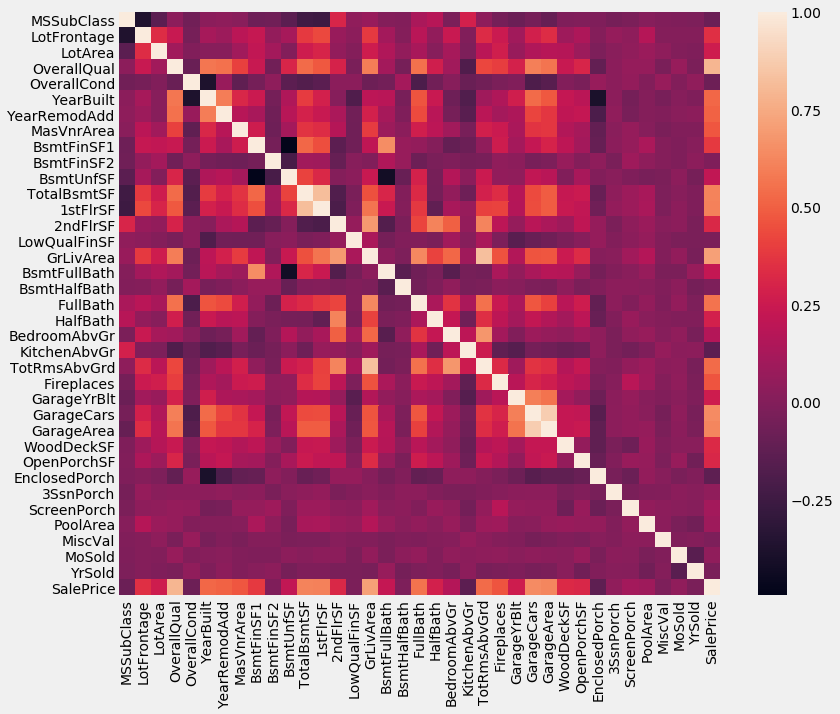

In [114]:
plt.figure(figsize=(12,10))
sns.heatmap(train_clean.corr())

In [115]:
#Suppresion des colonnes 1rstFloor, 2ndFloor,GarageArea,
train_clean=train_clean.drop(['1stFlrSF', '2ndFlrSF','GarageArea','GarageYrBlt'],axis=1)
train_clean


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,Unf,2.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,RFn,2.0,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,80.0,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,RFn,2.0,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,Unf,2.0,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [116]:
train_clean.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch

In [117]:
train_clean.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object


In [118]:
train_clean['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

In [119]:
#Transformation des colonnes 'YearBuilt','YearRemodAdd'
train_clean['YearBuilt'] = train_clean['YearBuilt'].apply(str)
train_clean['YearRemodAdd'] = train_clean['YearRemodAdd'].apply(str)
train_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [120]:
#Transformation des float  en int
train_clean['GarageCars'] = train_clean['GarageCars'].apply(int)
train_clean['TotalBsmtSF'] = train_clean['TotalBsmtSF'].apply(int)
train_clean['BsmtFinSF1'] = train_clean['BsmtFinSF1'].apply(int)
train_clean['MasVnrArea'] = train_clean['MasVnrArea'].apply(int)


In [121]:
#Transformation en catégorial

label_encoder = LabelEncoder()
train_clean['YearBuilt'] = label_encoder.fit_transform(train_clean['YearBuilt'])
train_clean['YearRemodAdd']=label_encoder.fit_transform(train_clean['YearRemodAdd'])
train_clean


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,104,53,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0.0,150.0,856,GasA,Ex,Y,SBrkr,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,77,26,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0.0,284.0,1262,GasA,Ex,Y,SBrkr,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,102,52,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0.0,434.0,920,GasA,Ex,Y,SBrkr,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,19,20,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0.0,540.0,756,GasA,Gd,Y,SBrkr,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,101,50,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0.0,490.0,1145,GasA,Ex,Y,SBrkr,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,94,45,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0.0,64.0,796,GasA,Ex,Y,SBrkr,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,Unf,2,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,105,55,Gable,CompShg,VinylSd,VinylSd,Stone,186,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0.0,317.0,1686,GasA,Ex,Y,SBrkr,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,RFn,2,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,80.0,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,74,23,Gable,CompShg,HdBoard,HdBoard,Stone,240,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32.0,216.0,1107,GasA,Ex,Y,SBrkr,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,RFn,2,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,35,0,Gable,CompShg,BrkFace,Wd Shng,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0.0,952.0,952,GasA,Gd,Y,FuseF,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,Unf,2,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


Visualisations des corrélations

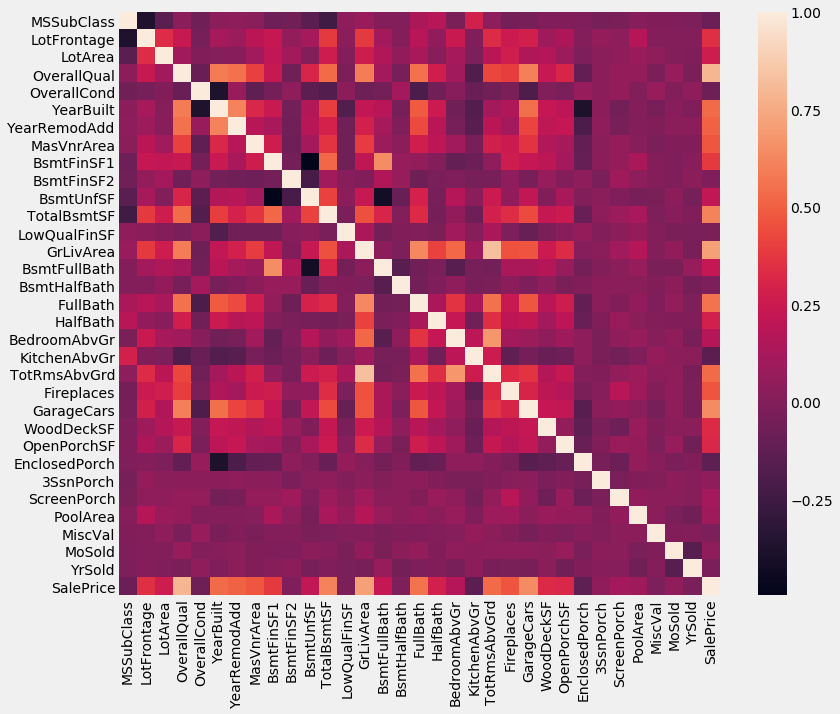

In [122]:
plt.figure(figsize=(12,10))
sns.heatmap(train_clean.corr())

## Gestion des outliers

In [123]:
train_clean.drop(1299, inplace=True)

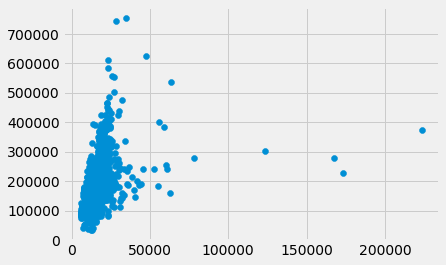

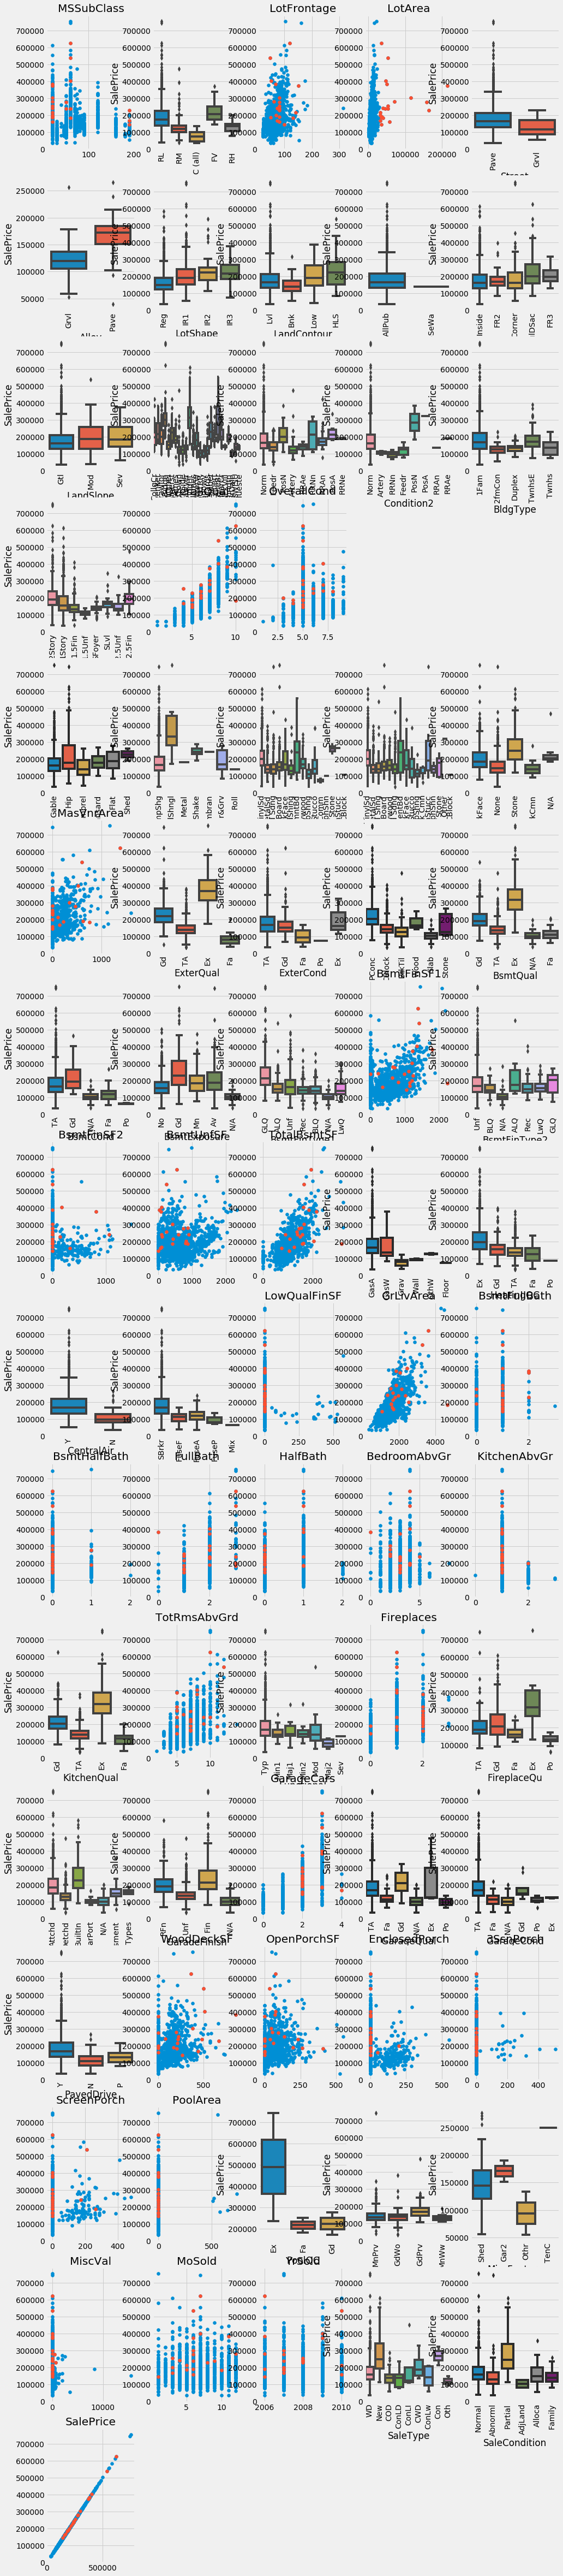

In [124]:
total = train_clean.drop('SalePrice',axis=1).aggregate("sum",axis=1)
plt.scatter(total,train_clean['SalePrice'])
outliers = total[total > np.mean(total) + (2*np.std(total))].index

view_correlations(train_clean,'SalePrice',outliers=list(outliers))
## poid de la branche sur toute la regression
#plt.scatter(train_clean[train_clean.index.isin(outliers)]['LotArea'],train_clean[train_clean.index.isin(outliers)]['LotArea'])

Les outliers désignés ne devraient pas avoir d'impact négatif sur notre régression

In [125]:
train_clean.drop(outliers,inplace=True)

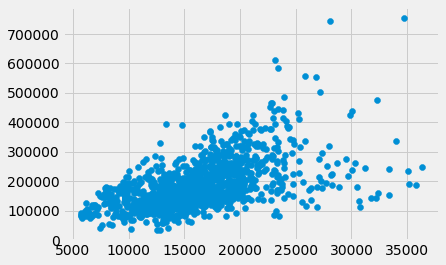

In [ ]:
total = train_clean.drop(['SalePrice'],axis=1).aggregate("sum",axis=1)
plt.scatter(total,train_clean['SalePrice'])

In [ ]:
outliers = total[total > np.mean(total) + (2*np.std(total))].index
view_correlations(train_clean,'SalePrice',outliers=list(outliers))

In [ ]:
view_one_correlation(train_clean,'SalePrice',figsize=(3,8))

## Modèle d'apprentissage
- Définir un seuil final pour le test_size

### Normalisation de X et y
Par une échèlle logarithmique

In [ ]:
# normalisation de X
X = np.log(X+1)

# Le target la variable à prédire
y = target
# normalisation de y
y = np.log(y+1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# Entrainement du model
model_house = linear_model.LinearRegression()
model_house.fit(X_train, y_train)

# prediction sur le test pour tester le model
y_pred = model_house.predict(X_test)

# Metrics
print('Mean Squared Error : {}\n'.format(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error : {}\n'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('coefficient de determination : {}\n'.format(r2_score(y_test, y_pred)))

## Prédiction sur le test

### Normalisation du df_test
Par une échèlle logarithmique

In [ ]:
#test_clean = test_clean[cols_features.drop('SalePrice')]

In [ ]:
df_test = np.log(df_test+1)

pred_test = model_house.predict(df_test)

### Dénormalisation de la prediction

Pour obtenir les valeurs à la bonne échèlle

In [ ]:
pred_test = np.exp(pred_test)

### Soumission sur Kaggle

In [ ]:
#pred_test = np.exp(pred_test)
pred = pd.DataFrame(test.index)
pred['SalePrice']=pred_test

In [ ]:
#pred

In [ ]:
pred.to_csv('house_prediction_kaggle', index=False, encoding='utf-8')

## Resultat Kaggle

In [ ]:
#<img src="C:/Users/Administrateur/Pictures/Screenshots/Capture d’écran (1).png">

# Regression Lasso

Pour que la regression lassoCV soit optimal il est néccessaire que les données soient normalisée c'est à dire centrée et réduites

In [ ]:
# LcvX correspond au dataframe du train
# Lcvdf_test correspond au dataframe du test
is_index_train = df_with_dummies.index.isin(train.index)
is_index_test = df_with_dummies.index.isin(test.index)

LcvX = df_with_dummies[is_index_train]
Lcvdf_test = df_with_dummies[is_index_test]

In [ ]:
# on concatène les données du train et de le target afin de les normaliser en même temps
LcvX = pd.concat((LcvX, target), axis=1)

### Normalisation

In [ ]:
sc_train = StandardScaler()

LcvX_norm = sc_train.fit_transform(LcvX)

### Construction du model

In [ ]:
model_house_lcv = LassoCV(normalize=False,fit_intercept=False,random_state=0,cv=5)

# lancement sur l'échantillon d'apprentissage
# -1 parceque le SalePrice se trouve à la fin
model_house_lcv.fit(LcvX_norm[:,:-1],LcvX_norm[:,-1])

## Application du modèle sur le test

### Normalisation du test

In [ ]:
sc_test = StandardScaler()
Lcvdf_test_norm =  sc_test.fit_transform(Lcvdf_test)

In [ ]:
# Prediction avec le modèle
pred_Lcv_norm = model_house_lcv.predict(Lcvdf_test_norm)

In [ ]:
# dénormalisation de la prédiction, [-1] parce que y est en dernière position
pred_Lcv = pred_Lcv_norm*np.sqrt(sc_train.var_[-1]) + sc_train.mean_[-1]

## Soumission Kaggle

In [ ]:
pred = pd.DataFrame(test.index)
pred['SalePrice']=pred_Lcv
pred.to_csv('first_house_prediction', index=False, encoding='utf-8')

In [ ]:
pred

# AZURE MACHINE LEARNING

## Machine Learning June

In [ ]:
Y = train_clean['SalePrice']
X = train_clean.drop(['SalePrice'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=100)
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.predict(X_test)
lm.score(X_test,y_test)

## Prédictions  sur le test ( june )

In [ ]:
view_total_na(test_clean)

In [ ]:
pred_test = lm.predict(test_clean)
predictions = pd.DataFrame({'Id':test_clean.index,'SalePrice': pred_test}) 
predictions.to_csv('submission', index=False, encoding='utf-8')

In [ ]:
predictions